In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
from math import log2
import statistics as stat


In [41]:
def load_file(filename):
    a = np.loadtxt(filename, dtype='str', comments='#')
    rsp = a[:,0]
    latencies = a[:,1]
    times = a[:,2]
    processors = a[:,3]
    work = a[:,4]
    i_steals = a[:,16]
    e_steals = a[:,17]

    return rsp, latencies, times, processors, work

directory = "/home/khatiri/these/projet/ws-simulator/Simulation/simulation/simulation/"


In [73]:
def compute_average(values, latence):
    average = defaultdict(int)
    run_number = defaultdict(int)
    
    for i in range(len(rsp)):
        if int(latencies[i]) == latence:
            run_number[float(rsp[i])] += 1
            average[float(rsp[i])] += int(values[i])
            
    for cle in average:
        average[cle] /= run_number[cle]
    return average

def compute_overhead_for_latence(data, latence):
    rsp, latencies, times, processors, work = data
    average = defaultdict(int)
    run_number = defaultdict(int)
    
    for i in range(len(rsp)):
        if int(latencies[i]) == latence:
            run_number[float(rsp[i])] += 1
            average[float(rsp[i])] += float(int(times[i]) - int(work[i])/int(processors[i]))
            
    for cle in average:
        average[cle] /= run_number[cle]

    return average, min(average.keys(), key=lambda x : average[x])


def compute_box_for_latence(data, latence, lim=0.0):
    rsp, latencies, times, processors, work = data
    values = defaultdict(list)
    run_number = defaultdict(int)
    
    for i in range(len(rsp)):
        if int(latencies[i]) == latence and float(rsp[i]) >= lim :
            run_number[float(rsp[i]) >= lim ] += 1
            values[float(rsp[i])].append(float(int(times[i]) - int(work[i])/int(processors[i])))
            
    return values


def compute_overhead(data, latence, variable):
    rsp, latencies, times, processors, work = data
    average = defaultdict(int)
    run_number = defaultdict(int)
    average = 0
    run_number = 0
    
    for i in range(len(rsp)):
        if float(rsp[i]) == variable and float(latencies[i]) == latence:
            run_number += 1
            average += float(int(times[i]) - int(work[i])/int(processors[i]))
            
    return average/run_number

In [43]:
def plot_for_best(filename):
    best = dict()
    data = load_file(filename)
    latencies = data[1]
    for latence in sorted(set(latencies), key=lambda x: int(x)):
        avg_overhead, minimum  = compute_overhead_for_latence(data, int(latence))
        best_avg_overhead = compute_overhead(data, int(latence), minimum)
        best[latence] = best_avg_overhead
    return best

In [44]:
def latence_for_best_param(filename):
    data = load_file(filename)
    latencies = data[1]
    best = dict()

    for latence in sorted(set(latencies), key=lambda x: int(x)):
        overhead, minimum = compute_overhead_for_latence(data, int(latence))
        #plt.subplot(223)
        #plt.plot(overhead.keys(), overhead.values())
        best[latence] = minimum
    return best



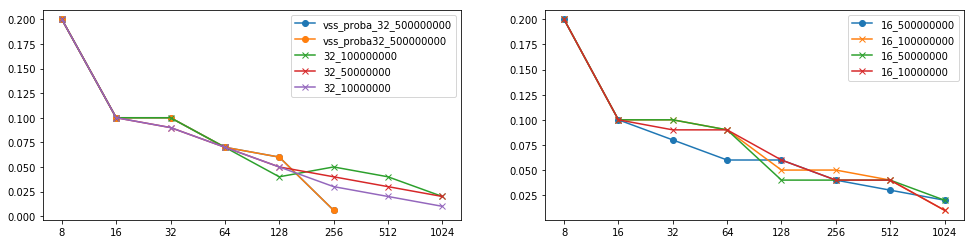

In [47]:
fig = plt.figure()
fig.set_size_inches(16.5, 8.5, forward=True)

best = latence_for_best_param(directory + "vss_proba_32_500000000")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "o-", label="vss_proba_32_500000000")

best = latence_for_best_param(directory + "vss_proba_32_500000000")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "o-", label="vss_proba32_500000000")



best = latence_for_best_param(directory + "vss_proba_32_100000000")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "x-", label="32_100000000")

best = latence_for_best_param(directory + "vss_proba_32_50000000")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "x-", label="32_50000000")

best = latence_for_best_param(directory + "vss_proba_32_10000000")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "x-", label="32_10000000")
plt.legend()

best = latence_for_best_param(directory + "vss_proba_16_500000000")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "o-", label="16_500000000")

best = latence_for_best_param(directory + "vss_proba_16_100000000")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "x-", label="16_100000000")

best = latence_for_best_param(directory + "vss_proba_16_50000000")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "x-", label="16_50000000")

best = latence_for_best_param(directory + "vss_proba_16_10000000")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "x-", label="16_10000000")
plt.legend()




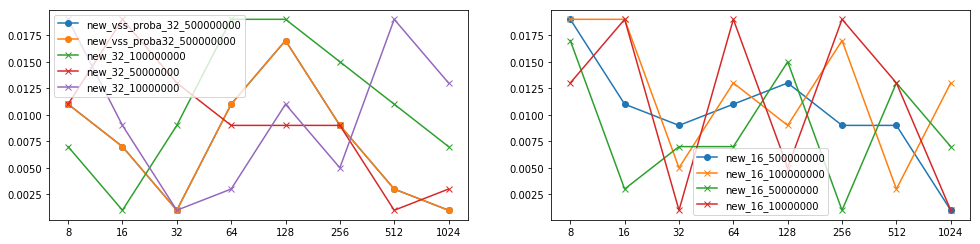

In [50]:
fig = plt.figure()
fig.set_size_inches(16.5, 8.5, forward=True)

best = latence_for_best_param(directory + "new_vss_proba_32_500000000_finition")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "o-", label="new_vss_proba_32_500000000")

best = latence_for_best_param(directory + "new_vss_proba_32_500000000_finition")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "o-", label="new_vss_proba32_500000000")



best = latence_for_best_param(directory + "new_vss_proba_32_100000000_finition")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "x-", label="new_32_100000000")

best = latence_for_best_param(directory + "new_vss_proba_32_50000000_finition")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "x-", label="new_32_50000000")

best = latence_for_best_param(directory + "new_vss_proba_32_10000000_finition")
plt.subplot(221)
plt.plot(best.keys(), best.values(), "x-", label="new_32_10000000")
plt.legend()

best = latence_for_best_param(directory + "new_vss_proba_16_500000000_finition")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "o-", label="new_16_500000000")

best = latence_for_best_param(directory + "new_vss_proba_16_100000000_finition")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "x-", label="new_16_100000000")

best = latence_for_best_param(directory + "new_vss_proba_16_50000000_finition")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "x-", label="new_16_50000000")

best = latence_for_best_param(directory + "new_vss_proba_16_10000000_finition")
plt.subplot(222)
plt.plot(best.keys(), best.values(), "x-", label="new_16_10000000")
plt.legend()


# A faire  :

Tourner des résultats pour rsp entre 0.001 et 0.02 pour bien tracer les courbes

Afficher l'interval de confiance


## overhead en fonction proba 

min for vp_32_500000000 :  0.09999999999999999
min for vss_proba_32_500000000 :  0.09999999999999999


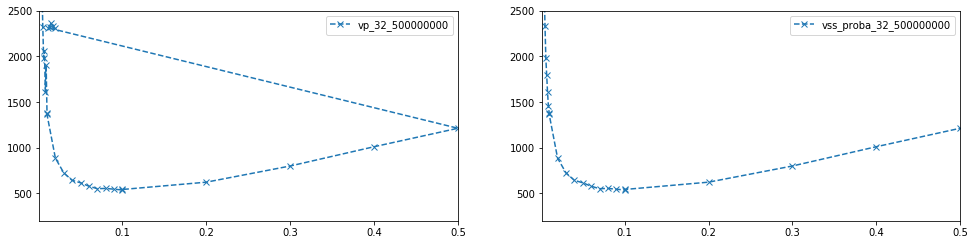

In [33]:
fig = plt.figure()
fig.set_size_inches(16.5, 8.5, forward=True)

data = load_file(directory + "vp_32_500000000")
overhead, minimum = compute_overhead_for_latence(data, 32)
plt.subplot(221)
plt.xlim(0.001, 0.5)
plt.ylim(200, 2500)
print("min for vp_32_500000000 : ", minimum)
plt.plot(overhead.keys(), overhead.values(), "x--", label="vp_32_500000000")
plt.legend()

data = load_file(directory + "vss_proba_32_500000000")
overhead, minimum = compute_overhead_for_latence(data, 32)
plt.subplot(222)
plt.xlim(0.001, 0.5)
plt.ylim(200, 2500)

plt.plot(overhead.keys(), overhead.values(), "x--", label="vss_proba_32_500000000")
plt.legend()
print("min for vss_proba_32_500000000 : ", minimum)



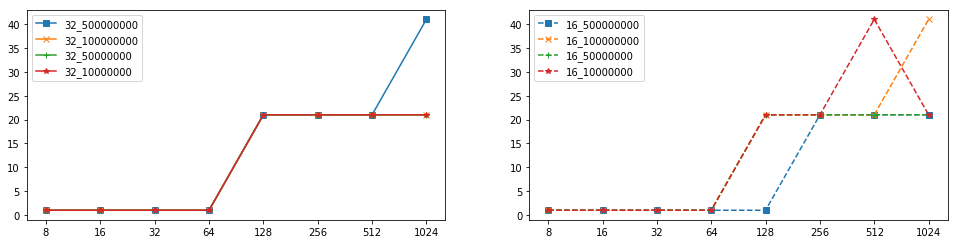

In [10]:
fig = plt.figure()
fig.set_size_inches(16.5, 8.5, forward=True)

plt.subplot(221)
best = latence_for_best_param(directory + "vss_static_32_500000000")
plt.plot(best.keys(), best.values(), "s-", label="32_500000000")

best = latence_for_best_param(directory + "vss_static_32_100000000")
plt.plot(best.keys(), best.values(), "x-", label="32_100000000")

best = latence_for_best_param(directory + "vss_static_32_50000000")
plt.plot(best.keys(), best.values(), "+-", label="32_50000000")

best = latence_for_best_param(directory + "vss_static_32_10000000")
plt.plot(best.keys(), best.values(), "*-", label="32_10000000")
plt.legend()
plt.subplot(222)

best = latence_for_best_param(directory + "vss_static_16_500000000")
plt.plot(best.keys(), best.values(), "s--", label="16_500000000")

best = latence_for_best_param(directory + "vss_static_16_100000000")
plt.plot(best.keys(), best.values(), "x--", label="16_100000000")

best = latence_for_best_param(directory + "vss_static_16_50000000")
plt.plot(best.keys(), best.values(), "+--", label="16_50000000")

best = latence_for_best_param(directory + "vss_static_16_10000000")
plt.plot(best.keys(), best.values(), "*--", label="16_10000000")
plt.legend()

# A faire :

tourner des simulations entre avec max_internal_steal entre {0 40} pour savoir une courbe bien precis

Afficher l'interface de confiance

min for vss_static_16_100000000 :  41.0
min for vss_static_16_500000000 :  21.0


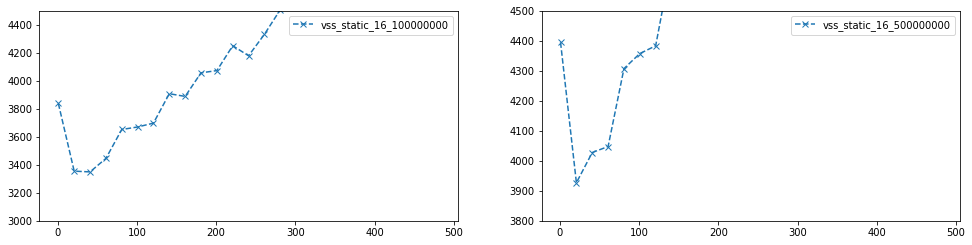

In [11]:
fig = plt.figure()
fig.set_size_inches(16.5, 8.5, forward=True)

data = load_file(directory + "vss_static_16_10000000")
overhead, minimum = compute_overhead_for_latence(data, 512)
plt.subplot(221)
plt.ylim(3000,4500)

print("min for vss_static_16_100000000 : ", minimum)
plt.plot(overhead.keys(), overhead.values(), "x--", label="vss_static_16_100000000")
plt.legend()

data = load_file(directory + "vss_static_16_50000000")
overhead, minimum = compute_overhead_for_latence(data, 512)
plt.subplot(222)
plt.ylim(3800,4500)
plt.plot(overhead.keys(), overhead.values(), "x--", label="vss_static_16_500000000")
plt.legend()
print("min for vss_static_16_500000000 : ", minimum)



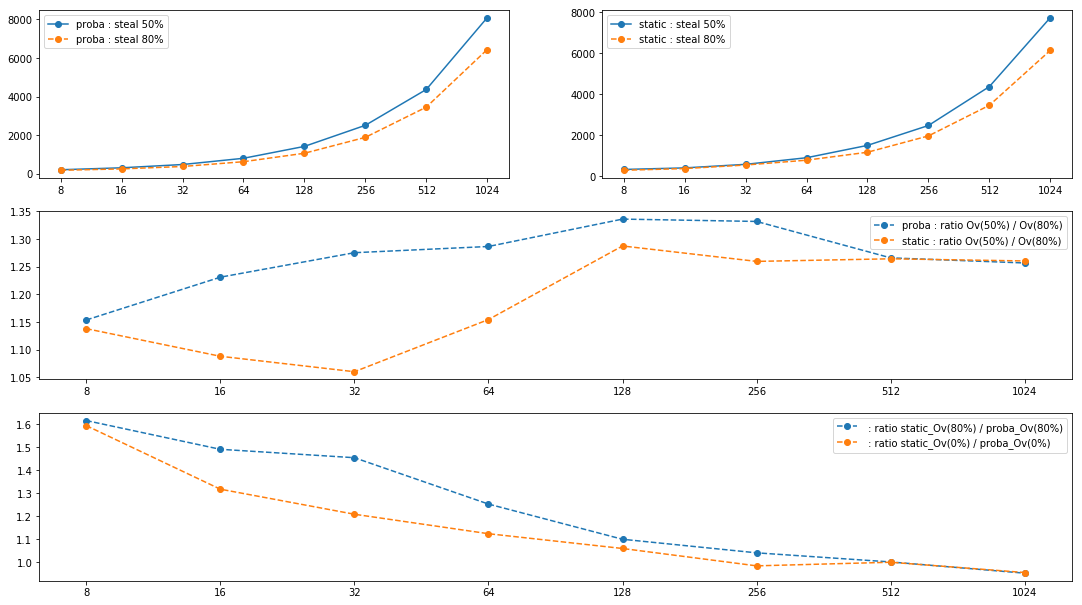

In [12]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

#filename = "/home/khatiri/these/projet/ws-simulator/Simulation/vss_proba_32_100000000"
filename = directory + "vss_proba_32_100000000"
best_proba_50 = plot_for_best(filename)

filename = directory + "vss_proba_32_100000000_0.8"
best_proba_80 = plot_for_best(filename)

plt.subplot(321)
plt.plot(best_proba_50.keys(), best_proba_50.values(), 'o-', label="proba : steal 50%")
plt.plot(best_proba_80.keys(), best_proba_80.values(), 'o--', label="proba : steal 80%")
plt.legend()


plt.legend()


#************************************ 

filename = directory + "vss_static_32_100000000"
best_static_50 = plot_for_best(filename)
plt.subplot(322)
plt.plot(best_static_50.keys(), best_static_50.values(), 'o-', label="static : steal 50%")

filename = directory + "vss_static_32_100000000_0.8"
best_static_80 = plot_for_best(filename)
plt.plot(best_static_80.keys(), best_static_80.values(), 'o--', label="static : steal 80%")
plt.legend()

plt.subplot(312)

plt.plot(best_proba_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_proba_50.values(), best_proba_80.values())],\
         'o--', label="proba : ratio Ov(50%) / Ov(80%)")

plt.plot(best_static_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_static_50.values(), best_static_80.values())],\
         'o--', label="static : ratio Ov(50%) / Ov(80%)")

plt.legend()
plt.subplot(313)

plt.plot(best_proba_80.keys(), [bs8/bp8 for (bp8, bs8) in zip(best_proba_80.values(), best_static_80.values())],\
         'o--', label=" : ratio static_Ov(80%) / proba_Ov(80%)")

plt.plot(best_proba_80.keys(), [bs5/bp5 for (bp5, bs5) in zip(best_proba_50.values(), best_static_50.values())],\
         'o--', label=" : ratio static_Ov(0%) / proba_Ov(0%)")

plt.legend()

# a faire : 

- Separer les courbes, les decrires,

- afficher les intervals de confiance

- mettre a jour les courbes avec les nouveaux dimulation


## amount of work steal (80% vs 50%)
we plot the overhead according to the latency for best parametre "$rsp$" or "$max\ internal\ steal$" 

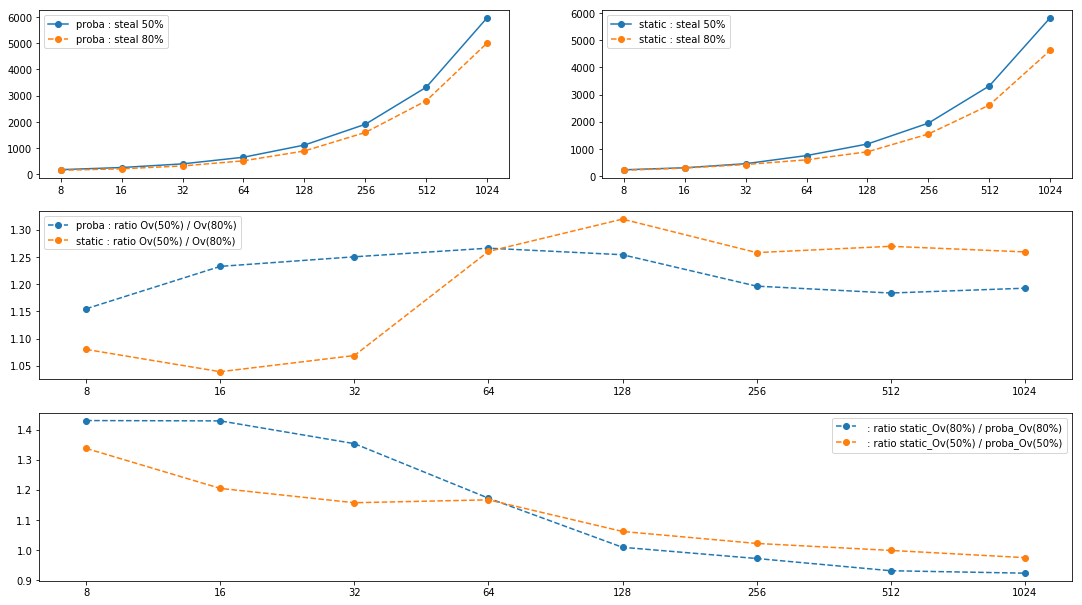

In [13]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

#filename = "/home/khatiri/these/projet/ws-simulator/Simulation/vss_proba_32_100000000"
filename = directory + "vss_proba_32_10000000"
best_proba_50 = plot_for_best(filename)

filename = directory + "vss_proba_32_10000000_0.8"
best_proba_80 = plot_for_best(filename)

plt.subplot(321)
plt.plot(best_proba_50.keys(), best_proba_50.values(), 'o-', label="proba : steal 50%")
plt.plot(best_proba_80.keys(), best_proba_80.values(), 'o--', label="proba : steal 80%")
plt.legend()


plt.legend()


#************************************ 

filename = directory + "vss_static_32_10000000"
best_static_50 = plot_for_best(filename)
plt.subplot(322)
plt.plot(best_static_50.keys(), best_static_50.values(), 'o-', label="static : steal 50%")

filename = directory + "vss_static_32_10000000_0.8"
best_static_80 = plot_for_best(filename)
plt.plot(best_static_80.keys(), best_static_80.values(), 'o--', label="static : steal 80%")
plt.legend()

plt.subplot(312)

plt.plot(best_proba_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_proba_50.values(), best_proba_80.values())],\
         'o--', label="proba : ratio Ov(50%) / Ov(80%)")

plt.plot(best_static_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_static_50.values(), best_static_80.values())],\
         'o--', label="static : ratio Ov(50%) / Ov(80%)")

plt.legend()
plt.subplot(313)

plt.plot(best_proba_80.keys(), [bs8/bp8 for (bp8, bs8) in zip(best_proba_80.values(), best_static_80.values())],\
         'o--', label=" : ratio static_Ov(80%) / proba_Ov(80%)")

plt.plot(best_proba_50.keys(), [bs5/bp5 for (bp5, bs5) in zip(best_proba_50.values(), best_static_50.values())],\
         'o--', label=" : ratio static_Ov(50%) / proba_Ov(50%)")

plt.legend()

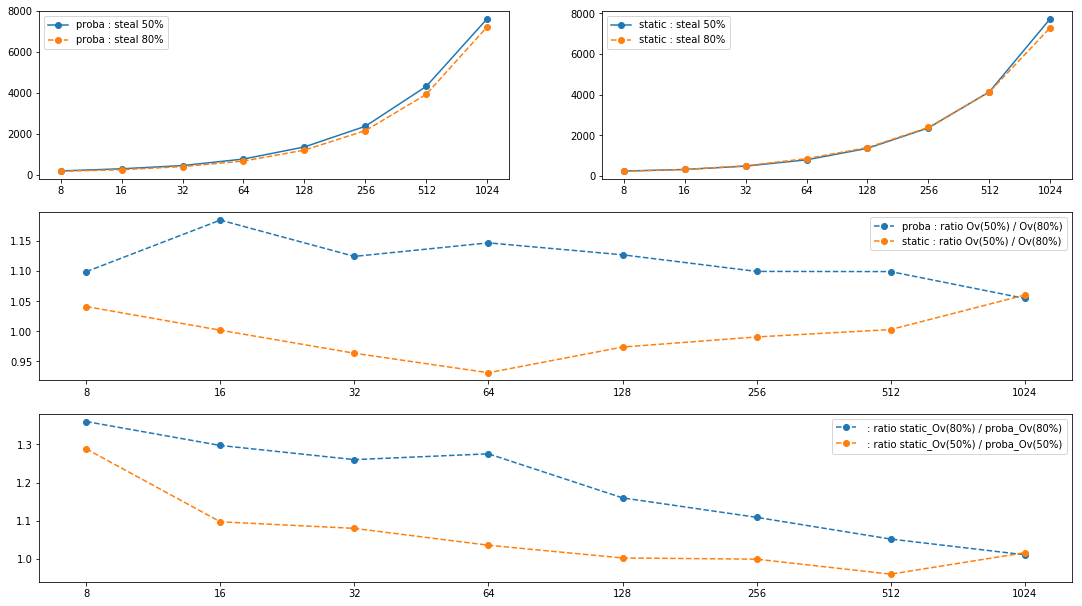

In [14]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

#filename = "/home/khatiri/these/projet/ws-simulator/Simulation/vss_proba_32_100000000"
filename = directory + "vss_proba_16_100000000"
best_proba_50 = plot_for_best(filename)

filename = directory + "vss_proba_16_100000000_0.8"
best_proba_80 = plot_for_best(filename)

plt.subplot(321)
plt.plot(best_proba_50.keys(), best_proba_50.values(), 'o-', label="proba : steal 50%")
plt.plot(best_proba_80.keys(), best_proba_80.values(), 'o--', label="proba : steal 80%")
plt.legend()


plt.legend()


#************************************ 

filename = directory + "vss_static_16_100000000"
best_static_50 = plot_for_best(filename)
plt.subplot(322)
plt.plot(best_static_50.keys(), best_static_50.values(), 'o-', label="static : steal 50%")

filename = directory + "vss_static_16_100000000_0.8"
best_static_80 = plot_for_best(filename)
plt.plot(best_static_80.keys(), best_static_80.values(), 'o--', label="static : steal 80%")
plt.legend()

plt.subplot(312)

plt.plot(best_proba_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_proba_50.values(), best_proba_80.values())],\
         'o--', label="proba : ratio Ov(50%) / Ov(80%)")

plt.plot(best_static_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_static_50.values(), best_static_80.values())],\
         'o--', label="static : ratio Ov(50%) / Ov(80%)")

plt.legend()
plt.subplot(313)

plt.plot(best_proba_80.keys(), [bs8/bp8 for (bp8, bs8) in zip(best_proba_80.values(), best_static_80.values())],\
         'o--', label=" : ratio static_Ov(80%) / proba_Ov(80%)")

plt.plot(best_proba_50.keys(), [bs5/bp5 for (bp5, bs5) in zip(best_proba_50.values(), best_static_50.values())],\
         'o--', label=" : ratio static_Ov(50%) / proba_Ov(50%)")

plt.legend()

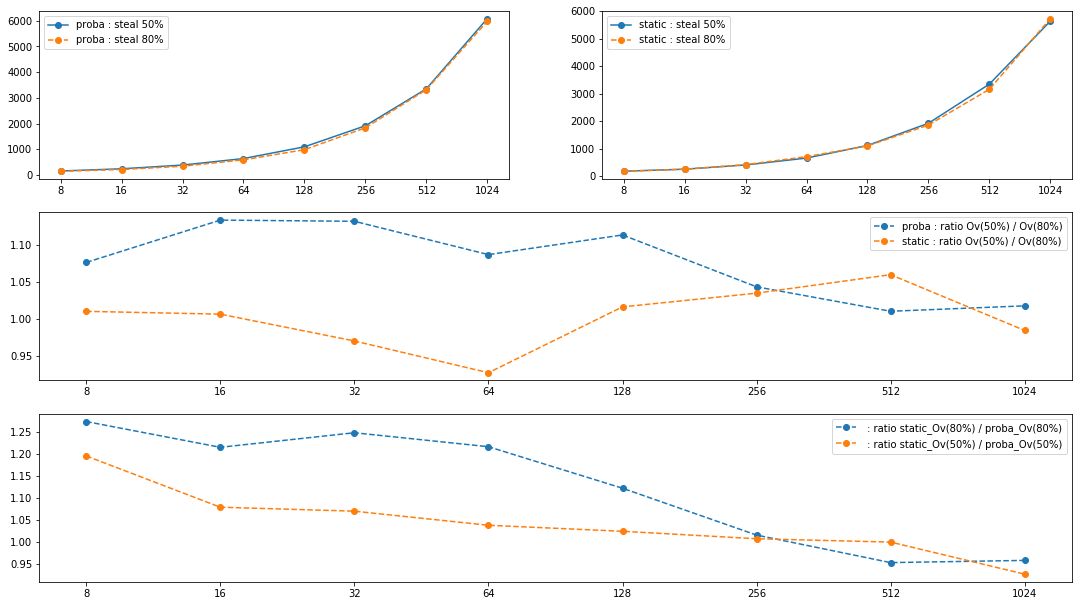

In [15]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

#filename = "/home/khatiri/these/projet/ws-simulator/Simulation/vss_proba_32_100000000"
filename = directory + "vss_proba_16_10000000"
best_proba_50 = plot_for_best(filename)

filename = directory + "vss_proba_16_10000000_0.8"
best_proba_80 = plot_for_best(filename)

plt.subplot(321)
plt.plot(best_proba_50.keys(), best_proba_50.values(), 'o-', label="proba : steal 50%")
plt.plot(best_proba_80.keys(), best_proba_80.values(), 'o--', label="proba : steal 80%")
plt.legend()


plt.legend()


#************************************ 

filename = directory + "vss_static_16_10000000"
best_static_50 = plot_for_best(filename)
plt.subplot(322)
plt.plot(best_static_50.keys(), best_static_50.values(), 'o-', label="static : steal 50%")

filename = directory + "vss_static_16_10000000_0.8"
best_static_80 = plot_for_best(filename)
plt.plot(best_static_80.keys(), best_static_80.values(), 'o--', label="static : steal 80%")
plt.legend()

plt.subplot(312)

plt.plot(best_proba_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_proba_50.values(), best_proba_80.values())],\
         'o--', label="proba : ratio Ov(50%) / Ov(80%)")

plt.plot(best_static_80.keys(), [bp5/bp8 for (bp5, bp8) in zip(best_static_50.values(), best_static_80.values())],\
         'o--', label="static : ratio Ov(50%) / Ov(80%)")

plt.legend()
plt.subplot(313)

plt.plot(best_proba_80.keys(), [bs8/bp8 for (bp8, bs8) in zip(best_proba_80.values(), best_static_80.values())],\
         'o--', label=" : ratio static_Ov(80%) / proba_Ov(80%)")

plt.plot(best_proba_50.keys(), [bs5/bp5 for (bp5, bs5) in zip(best_proba_50.values(), best_static_50.values())],\
         'o--', label=" : ratio static_Ov(50%) / proba_Ov(50%)")

plt.legend()

In [16]:
# A faire :

- tourner plus de resultats pour clarifier les choses
- tourner des resultats pour les autres strategies

SyntaxError: invalid syntax (<ipython-input-16-5f1fde9c6e10>, line 3)

min for new_vss_proba_16_100000000_finition :  0.005
min for vss_proba_16_100000000 :  0.09999999999999999


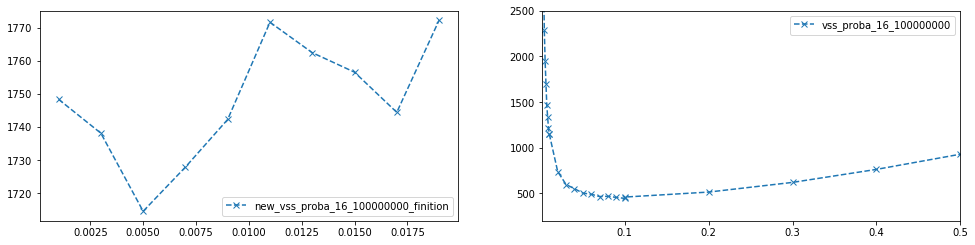

In [51]:
fig = plt.figure()
fig.set_size_inches(16.5, 8.5, forward=True)

data = load_file(directory + "new_vss_proba_16_100000000_finition")
overhead, minimum = compute_box_for_latence(data, 32)
plt.subplot(221)
print("min for new_vss_proba_16_100000000_finition : ", minimum)
plt.plot(overhead.keys(), overhead.values(), "x--", label="new_vss_proba_16_100000000_finition")
plt.legend()

data = load_file(directory + "vss_proba_16_100000000")
overhead, minimum = compute_overhead_for_latence(data, 32)
plt.subplot(222)
plt.xlim(0.001, 0.5)
plt.ylim(200, 2500)

plt.plot(overhead.keys(), overhead.values(), "x--", label="vss_proba_16_100000000")
plt.legend()
print("min for vss_proba_16_100000000 : ", minimum)



[Text(0, 0, '0.001'),
 Text(0, 0, '0.003'),
 Text(0, 0, '0.005'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.009000000000000001'),
 Text(0, 0, '0.011'),
 Text(0, 0, '0.013000000000000001'),
 Text(0, 0, '0.015'),
 Text(0, 0, '0.017'),
 Text(0, 0, '0.019000000000000003')]

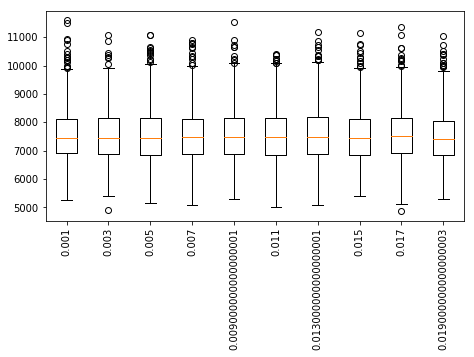

In [111]:
fig = plt.figure()
fig.set_size_inches(16.5, 8.5, forward=True)

data = load_file(directory + "new_vss_proba_32_100000000_finition")
values = compute_box_for_latence(data, 128)
plt.subplot(221)
plt.boxplot(values.values())
plt.xticks(rotation = 90);

plt.gca().xaxis.set_ticklabels(values.keys())
